#### _Speech Processing Labs: SIGNALS 1: More on Interpreting the DFT (Extension)_

In [1]:
## Run this first! 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import cmath
from math import floor
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
plt.style.use('ggplot')

from dspMisc import *

# More on Interpreting the  DFT

<div class="alert alert-success">
    <em> <strong>This notebook is extension material:</strong>  This notebook goes through DFT output frequencies and leakage in more detail than is strictly necessary for this course.  It's perfectly fine to skip it for now.  </em>
</div>

### Learning Outcomes
* Understand how sampling rate effects the DFT output
* Understand what the DFT leakage is.

### Need to know
* Topic Videos: Fourier Analysis, Frequency Domain
* [Digital Signals: Sampling sinusoids](./signals-1-2-sampling-sinusoids.ipynb)
* [The Discrete Fourier Transform](./signals-1-3-discrete-fourier-transform-in-detail.ipynb)






<div class="alert alert-warning">
<strong>Equation alert</strong>: If you're viewing this on github, please note that the equation rendering is not always perfect. You should view the notebooks through a jupyter notebook server for an accurate view.
</div>

## A Very Quick Recap of the DFT

The [previous notebook](./signals-1-3-discrete-fourier-transform-in-detail.ipynb) went through the mechanics of the Discrete Fourier Transform (DFT).  To summarize, the DFT input and output are broadly: 

* **Input:**  $N$ amplitude samples over time 
    * $x[n]$, for $n=0..N-1$ (i.e. a time series of $N$ samples)
    
    
* **Output:** the dot product (i.e., the similiarity) between the input and $N$ sinusoids with different frequencies
    * DFT[k] $= Me^{-j\phi}$, i.e. a complex number (in polar form) with **magnitude** $M$ and **phase** angle $\phi$
    * The $N$ DFT outputs represent $N$ equally space frequencies between 0 and the sampling rate.

     
The outputs are calculated using the following formula for $k=0,...N-1$.   

$$ 
\begin{align}
DFT[k] &= \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi nk}{N}} \\
&= \sum_{n=0}^{N-1} x[n]\big[\cos\big(\frac{2\pi nk}{N} \big) - j \sin\big(\frac{2\pi nk}{N} \big) \big]
\end{align}
$$

You can think DFT[k] as a **complex sinusoid**, which looks like an analogue clockhand (i.e. a vector) ticking (i.e., rotating) around a clockface (i.e. a circle), where the length of the hand is the **peak amplitude** of that wave, and how fast it goes around the clock is it's frequency.  Each of these DFT[k] 'clocks' corresponds to a sinusoid of a specific frequency.

Each DFT[k] output essentially tells us whether the input signal has a sinusoidal component that matches the $k$th DFT complex sinusoid frequency. So, we talk about the DFT outputs as providing the **frequency response** of the input signal. 

Since the the DFT outputs are complex numbers, we can talk about them in terms of magnitude and phase angle: The **magnitude** of DFT[k] tells us how much we'd weight the $k$-th complex sinusoid if we were to try to reconstruct the original input by adding all the DFT complex sinusoids together.  The **phase angle** of DFT[k] tells use whether we need to shift that wave along the time axis. 

## The DFT Frequency Response:  Which Frequencies?

In [the first notebook on interpreting the DFT](./signals-1-1-interpreting-the-discrete-fourier-transform.ipynb) we saw that for input of length $N$, the DFT **output analysis frequencies** are $N$ evenly space points between 0 Hz and the sampling rate. So, how can we see this from the DFT equation?  

We can first note that DFT[0] (corresponding to a 0 Hz, i.e., a complex sinusoid but stuck at one point) is the average of the input sequence. This tells us  the amplitude of the waveform (i.e. whether it's centered above or below 0 in amplitude).  This is often referred to as the DC component ('Direct Current') in electrical engineering texts. 

Now, we can work out all the other output frequencies by noticing that DFT[1] represents a complex sinusoid that takes N equal steps to make one complete one full circle (clockwise starting from (1,0)).  So, $e^{-j 2\pi n/N}$ in the equation represents the $n$th step around the circle. 

Let's denote the **sampling rate** as $f_s$ (samples/second).  We can then figure out the frequency of represented by DFT[1] by figuring out the time it takes to make one cycle (i.e., the period), which is the time it takes to make $N$ steps. 

* The time between each sample (i.e., the **sampling time**) is $t_s = 1/f_s$  (seconds)


* So, $N$ samples takes $t_s \times N$  (seconds x samples = seconds)
  
  
* And it will take the $k=1$ complex sinusoid $T = t_s \times N$  (seconds) to make 1 complete cycle
    * This is the **period** or **wavelength** of the complex sinusoid
 
 
* Thus, the **frequency** of the $k=1$ complex sinusoid is $f_{min} = 1/T = 1/(t_s N) $ (cycles/second) 
    * i.e., $f_{min} = f_s/N$

So, the minimum frequency that we can analyse in an application of the DFT $f_{min}$ depends on the input size $N$ and the sampling rate $f_s$. 


From there we can see that DFT[k] represents a complex sinusoid that completes the circle $k$ times faster than the one corresponding to DFT[1]. That is, 
<div class="alert alert-success">
    The <b>frequency</b> associated with DFT[k] is: 
    $kf_{min}$ (cycles/second) = $kf_s/N$
</div>


Since  $k$ = 0,...,$N-1$, this is the same as saying we take taking N evenly space points between 0 Hz and the sampling rate, $f_s$, which is the shortcut we took in [the first notebook on the DFT](./signals-1-1-interpreting-the-discrete-fourier-transform.ipynb).  

Thinking about this in terms of sampling rates and aliasing  explains why you get the mirroring effect in the DFT outputs: Once you get to half the sampling rate, your samples are too far apart (in time) to capture the actual frequency of the sinusoid, as we can't capture 2 points per cycle. Sinusoids of those higher frequencies become indistinguishable from their lower (mirror) counterpart.  So in analyzing what frequency components are in an input signal we only consider the first $N/2$ DFT outputs (corresponding to 0 to $f_s/2$ Hz, i.e. the Nyquist Frequency)  

So, the important thing to remember is that the DFT outputs depend on: 

* The **number of samples** in the input sequence, $N$
* The **sampling rate**, $f_s$ samples/second 


### Exercise
Assume we have a sampling rate of $f_s = 32$ samples/second, and an input length of $N=16$. 

* What's the frequency associated with DFT[1]? 
* What's the frequency associated with DFT[5]?


### Notes

## Leakage 

One of the main things to remember about the DFT is that you're calculating the correlation between the input and basis sinusoids with specific frequencies.  If your input exactly matches one of those basis sinusoid frequencies the magnitude response will show a positive magnitude for that  sinusoid and zero for everything else.  However, if the input frequency falls between output frequencies, then you'll see **spectral leakage**.  The DFT outputs close to the input frequency will also get positive magnitudes, with the DFT output closest to the input frequency getting the highest magnitude. 

The following code gives an example


Text(0.5, 1.0, 'Leakage example (time domain)')

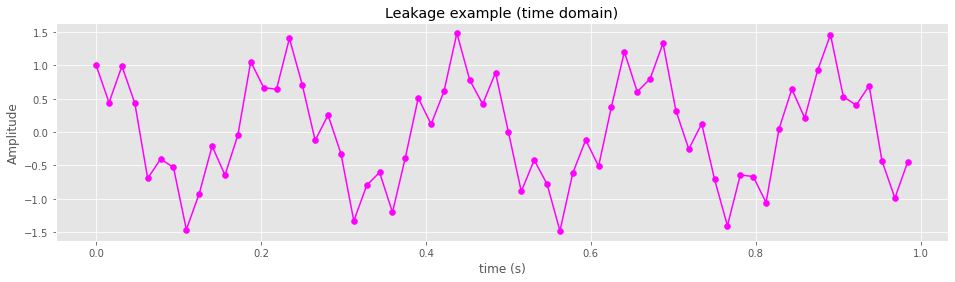

In [2]:
## input size
N=64

## sampling rate
f_s = 64

freq1 = 4.5 ## In between DFT output frequencies 
freq2 = 20 ## One of the DFT outputs
#freq2 = 6

amplitude1 = 1
amplitude2 = 0.5

x1, time_steps = gen_sinusoid(frequency=freq1, phase=0, amplitude=amplitude1, sample_rate=f_s, seq_length=N, gen_function=np.cos)
x2, time_steps = gen_sinusoid(frequency=freq2, phase=np.pi/2, amplitude=amplitude2, sample_rate=f_s, seq_length=N, gen_function=np.cos)
x_compound = x1  + x2

## Plot the input
fig, timedom = plt.subplots(figsize=(16, 4))
timedom.scatter(time_steps, x_compound, color='magenta')
timedom.plot(time_steps, x_compound, color='magenta')
timedom.set_xlabel("time (s)")
timedom.set_ylabel("Amplitude")
timedom.set_title("Leakage example (time domain)")



Text(0.5, 1.0, 'Leakage example: Magnitude response')

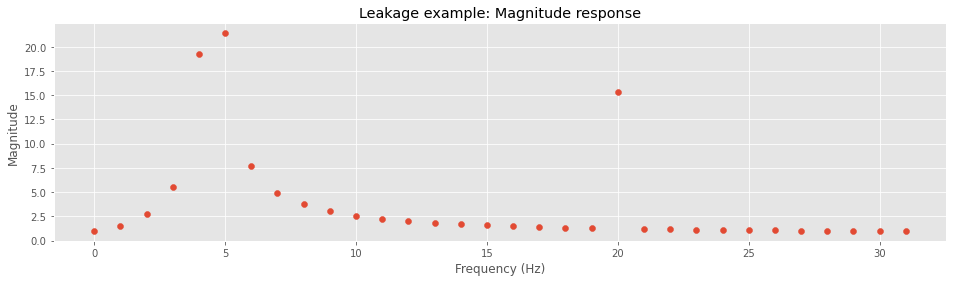

In [3]:
## Do the DFT on the compound waveform as above: 
mags, phases = get_dft_mag_phase(x_compound, seq_len=N)
dft_freqs = get_dft_freqs_all(sample_rate=f_s, seq_len=N)

## Plot the magnitudes
fig, fdom = plt.subplots(figsize=(16, 4))

## Just plot the first N/2 frequencies since we know that they are the mirrored for k>N/2
fdom.scatter(dft_freqs[:round(N/2)], mags[:round(N/2)])
fdom.set_xlabel("Frequency (Hz)")
fdom.set_ylabel("Magnitude")
fdom.set_title("Leakage example: Magnitude response")
#print(mags)



### Leakage as the normalized sinc function 

Leakage makes the DFT harder to interpret. However, we can derive the shape that leakage will have from the the DFT equation and some algebra about rectangular functions.  It turns out that leakage for a particular frequency follows the normalized **sinc** function: 

$$
\begin{align}
X(m) &= \Big|\frac{AN}{2} \cdot \mathop{sinc}(c-m)\Big|\\
&= \Big|\frac{AN}{2} \cdot \frac{\sin(\pi(c-m))}{2\pi(c-m)}\Big|\\
\end{align}
$$



Where $A$ is the peak amplitude of the input, $N$ is the input sequence length, $c$ is the number of cycles completed in the input sequence time.  If $c$ is a whole number we just get the usual DFT response (i.e. a single spike at the corresponding frequency), but if $c$ is not a whole number, we get a spread across output frequency bins.

The sinc function is a bit hard to think about from just the equation, but it's easy to recognize when plotted (as below)

Let's check whether the sinc function matches what we get in the DFT. First we write a function to evaluate the leakage function in between our DFT outputs.

In [4]:
## Calculate the approximated leakage as the sinc function
def calc_leakage(freq,  sample_rate, seqlen, amplitude=1):
    sequence_time = (1/sample_rate)*seqlen
   
    ## number of cycles in input for component
    c = freq * sequence_time
    print("c=", c)
    
    ## Interpolate between DFT ouput indices
    ms = np.arange(0, seqlen, 0.1)
    
    ## Approximated response - we could actually just return a function here, but 
    ## let's just keep things concrete for now.
    leakage = np.abs(amplitude * seqlen * 0.5 * np.sinc((c-ms)))

    return leakage, ms * (sample_rate/seqlen)




Now let's plot the leakage predicted for our two input components separately (top) and added together (bottom)

c= 4.5
c= 20.0


Text(0.5, 1.0, 'Sum of leakage functions for input components')

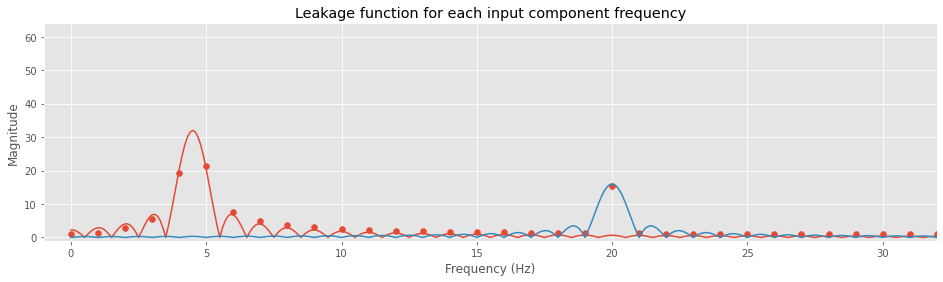

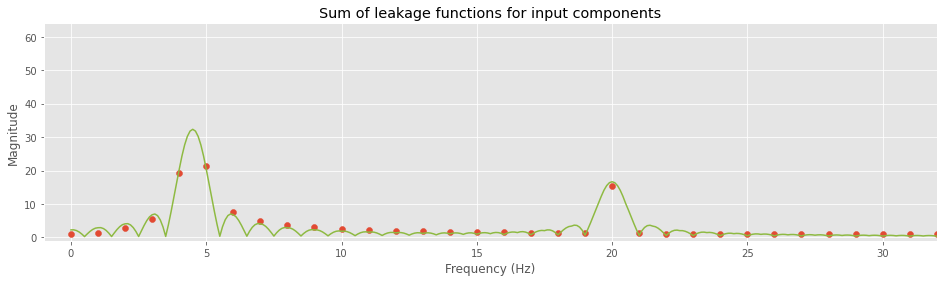

In [5]:
## Calculate the leakage function for our know input wave components
leakage1, ms = calc_leakage(freq1, f_s, N, amplitude=amplitude1)
leakage2, ms = calc_leakage(freq2, f_s, N, amplitude=amplitude2)


## Plot the magnitude response and the leakage function for each of our input components
fig, fdom = plt.subplots(figsize=(16, 4))
fdom.set(xlim=(-1, N/2), ylim=(-1, N))
fdom.scatter(dft_freqs, mags)


fdom.plot(ms, leakage1)
fdom.plot(ms, leakage2)
fdom.set_xlabel("Frequency (Hz)")
fdom.set_ylabel("Magnitude")
fdom.set_title("Leakage function for each input component frequency")

## Plot the magnitude response and the sum of the leakage functions
fig, fdom = plt.subplots(figsize=(16, 4))
fdom.set(xlim=(-1, N/2), ylim=(-1, N))
fdom.scatter(dft_freqs, mags)
fdom.plot(ms, leakage1 + leakage2, color='C5')
fdom.set_xlabel("Frequency (Hz)")
fdom.set_ylabel("Magnitude")
fdom.set_title("Sum of leakage functions for input components")

## It fits, though not perfectly!

In the top figure, you should see that peaks (**main lobes**) of each leakage function are aligned with our input component frequencies. The peaks are at the same points as the DFT outputs when the sinusoidal component has a frequency matching the DFT output frequency (i.e. 12 Hz).  Otherwise we see the spread of leakage around the input component frequency (i.e. around 4.5 Hz).  

You'll also notice that our DFT magnitudes points don't always line up perfectly with our sinc curves.  Part of this is because the leakage function is an _approximation_.  Nevertheless, it's a very good approximation! 

### Exercise

* What happens if the frequencies of the two components making the compound waveform are very close together? 
    * e.g. make `f_in2=6`
* What if one of the components has a relatively small amplitude? 
    * e.g. change `amplitude` of the second input to 0.5

### Notes

### Shaping the lobes
The leakage sinc function has a peak around a specific frequency. If we want our DFT to be better able to distinguish between close frequencies, we need that peak, the **main lobe** to be narrower.  We also want the other peaks, the **side lobes** to be flatter.  We can achieve this using different **windowing methods** on our input.  This is why you see 'Hanning' as the default option for window method in the advanced spectrogram settings in praat.  

We'll see some more examples of this when we look at different types of filters later.  But for now the main thing to observe is that leakage might give you the impression that specific frequency components are present in your waveform, when what's actually happening is that your waveform has frequencies that don't match the DFT sinusoids.  Another thing that can happen is that the peak for a low amplitude component gets subsumed into the main lobe of a nearby frequency component.  This might make you miss frequency components in your input! 

## Extra: 

Here's the composition and decomposition for the compound waveform one you saw in Notebook 1! 

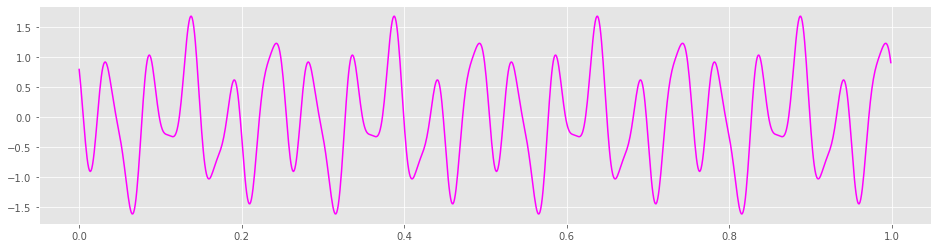

In [6]:
N=1028
f_s = 1028
f_in1 = 8 ## In between DFT output frequencies
f_in2 = 20  ## One of the DFT outputs
f_in3 = 36  ## One of the DFT outputs


x1, time_steps = gen_sinusoid(frequency=f_in1, phase=0, amplitude=0.5, sample_rate=f_s, seq_length=N, gen_function=np.cos)
x2, time_steps = gen_sinusoid(frequency=f_in2, phase=np.pi/2, amplitude=1, sample_rate=f_s, seq_length=N, gen_function=np.cos)
x3, time_steps = gen_sinusoid(frequency=f_in3, phase=0, amplitude=0.3, sample_rate=f_s, seq_length=N, gen_function=np.cos)


x_compound = x1  + x2 + x3

## Plot the input
fig, timedom = plt.subplots(figsize=(16, 4))
#timedom.scatter(time_steps, x_compound, color='magenta')
#timedom.set(xlim=(0, 0.2))
timedom.plot(time_steps, x_compound, color='magenta')

Text(0.5, 1.0, 'component 3: 36 Hz')

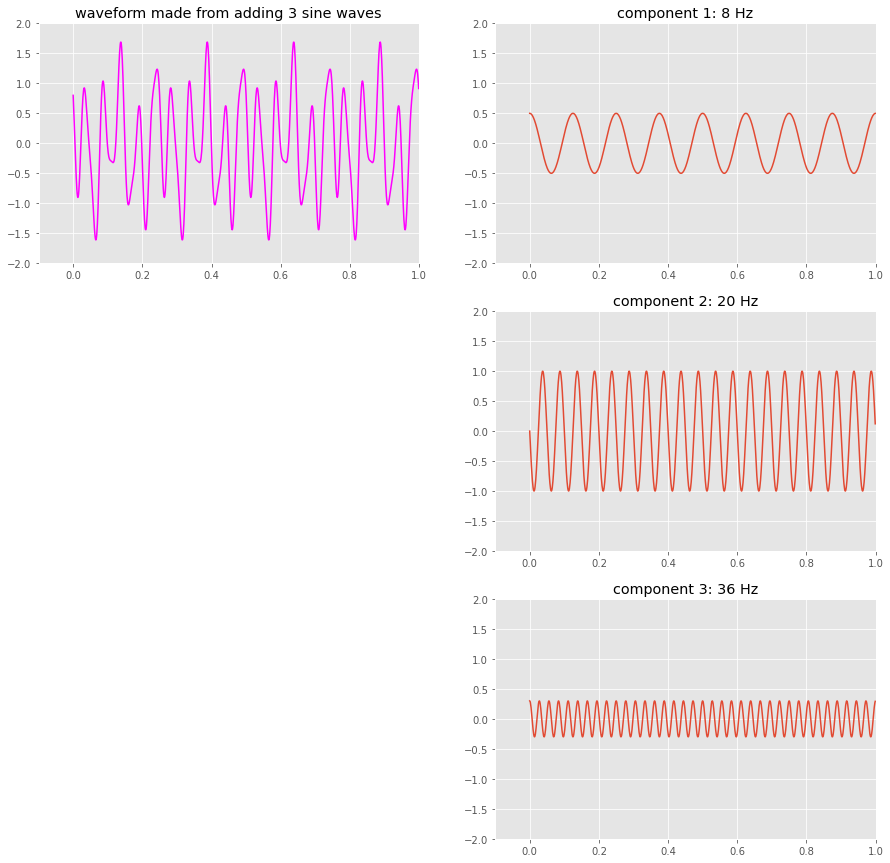

In [7]:
## Plot the input

fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(3,2)

ymax=2
timedom = fig.add_subplot(gs[0, 0])
timedom.set(xlim=(-0.1, 1), ylim=(-ymax,ymax))
timedom.plot(time_steps, x_compound, color='magenta')
timedom.set_title("waveform made from adding 3 sine waves")



s1 = fig.add_subplot(gs[0, 1])
s1.set(xlim=(-0.1, 1), ylim=(-ymax,ymax))
s1.plot(time_steps, x1)
s1.set_title("component 1: 8 Hz")

s2 = fig.add_subplot(gs[1, 1])
s2.set(xlim=(-0.1, 1), ylim=(-ymax,ymax))
s2.plot(time_steps, x2)
s2.set_title("component 2: 20 Hz")



s3 = fig.add_subplot(gs[2, 1])
s3.set(xlim=(-0.1, 1), ylim=(-ymax,ymax))
s3.plot(time_steps, x3)
s3.set_title("component 3: 36 Hz")


#fig.savefig("../fig/compound_waveform.png")

Text(0.5, 1.0, 'Magnitude Response')

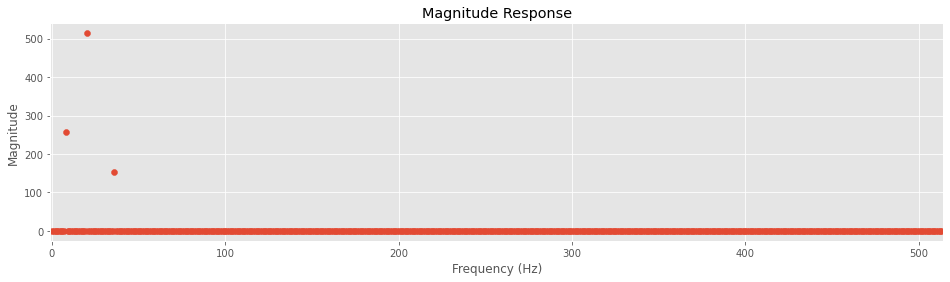

In [8]:
## Do the DFT on the compound waveform as above: 
mags, phases = get_dft_mag_phase(x_compound, seq_len=N)
dft_freqs = get_dft_freqs_all(sample_rate=f_s, seq_len=N)

## Plot the magnitudes
fig,fdom = plt.subplots(figsize=(16, 4))
fdom.set(xlim=(-1, N/2))
## Just plot the first N/2 frequencies since we know that they are the mirrored for k>N/2
fdom.scatter(dft_freqs[:round(N/2)], mags[:round(N/2)])
fdom.set_xlabel("Frequency (Hz)")
fdom.set_ylabel("Magnitude")
fdom.set_title("Magnitude Response")
#print(mags)

